In [153]:
import json
import pandas as pd
import re
import requests
import io

import tweepy

consumer_key = 'YOUR CONSUMER KEY'

consumer_secret = 'YOUR CONSUMER SECRET'

access_token = 'YOUR ACCESS TOKEN'

access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


# here i will retrieve data from Predication images

In [154]:
site = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url = site )


In [159]:
j = r.content

pred = pd.read_csv(io.StringIO(j.decode('utf-8')),sep='\t')
#pd.DataFrame()


In [161]:
pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# i will retreive twitter enhanced

In [162]:
tweet_enhanced = pd.read_csv('Downloads/twitter-archive-enhanced.csv')

In [165]:
tweet_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [2]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [3]:
tweets = []
for line in open('Desktop/tweet-json.txt', 'r'):
    tweets.append(json.loads(line,parse_float=str))


In [4]:
df = pd.DataFrame(tweets)

In [5]:
# here i would like to write a new file to examine the data in full text 

df.full_text.to_csv('Desktop/full_txt.csv')


tweets[1]

In [6]:
df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [8]:
#df.drop(['contributors','geo','coordinates'],axis=1,inplace=True)

In [9]:
df.lang.unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

In [10]:
name = []
for i in df['full_text']:
    if re.search(pattern='(This is)\ [A-z]\w*',string=i):
        name.append(re.search(pattern='(This is)\ [A-z]\w*',string=i).group(0))
    elif re.search(pattern='(name is)\ [A-z]\w*',string=i):
        name.append(re.search(pattern='(name is)\ [A-z]\w*',string=i).group(0))
    else :
        name.append('none')

In [11]:
df.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
221,None,None,Wed Apr 05 17:00:34 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Gidget. She's a spy pup...,None,...,NaN,NaN,NaN,NaN,5513,False,{'created_at': 'Sun Feb 19 01:23:00 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
422,None,None,Wed Jan 18 17:07:18 +0000 2017,"[0, 82]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 821765912948772865, 'id_str'...",9317,False,This is Duchess. She uses dark doggo forces to...,None,...,False,NaN,NaN,NaN,1899,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1491,None,None,Thu Jan 28 16:53:37 +0000 2016,"[0, 92]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 692752274041507842, 'id_str'...",7496,False,"""Hello yes could I get one pupper to go please...",None,...,False,NaN,NaN,NaN,4124,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1592,None,None,Mon Jan 11 02:40:19 +0000 2016,"[0, 90]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 686377054594441218, 'id_str'...",2433,False,Meet Birf. He thinks he's gone blind. 10/10 ve...,None,...,False,NaN,NaN,NaN,637,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1824,None,None,Mon Dec 14 16:34:00 +0000 2015,"[0, 101]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 676439996623097856, 'id_str'...",1863,False,Hope your Monday isn't too awful. Here's two b...,None,...,False,NaN,NaN,NaN,748,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [12]:
df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [13]:
df.quoted_status_id_str.nunique()

29

In [14]:
df.possibly_sensitive_appealable.nunique()

1

In [15]:
df.truncated.nunique()

1

In [16]:
df.full_text[2000]

'Say hello to Jazz. She should be on the cover of Vogue. 12/10 gorgeous pupper https://t.co/mVCMemhXAP'

## Visual Assesing the data :

    **- we need to drop most of the columns as they don't have any values
    
    **- most columns are string 
    
    **-entities contains json object
    
    **- source have 4 diffrent application
    
    **-user column contain json object
    
    **-retweeted, possibly_sensitive_appealable and truncated columns only conatin False value
    
    **- lang column has 9 languages
    
    **- id and id_str has the same value
    
    **- extended_entities conatin the image of the dogs in json object
    
    **- full_text column contain the tweet text which has the name of the dogs.
    
    **- it also contain the type of the dogs
    

In [17]:
cols = df.columns.get_values()

user = pd.io.json.json_normalize(df.user)
entities = pd.io.json.json_normalize(df.entities)


In [18]:
#remove unneeded columns
df.drop(['entities','favorited','id_str','in_reply_to_screen_name','place','truncated','possibly_sensitive_appealable','possibly_sensitive','in_reply_to_user_id',
         'in_reply_to_status_id_str','retweeted_status','quoted_status','in_reply_to_user_id_str','quoted_status_id','quoted_status_id_str','in_reply_to_status_id','display_text_range','is_quote_status','retweeted','contributors','geo','coordinates','lang'],axis=1,inplace=True)


In [19]:
df.head()

,created_at,extended_entities,favorite_count,full_text,id,retweet_count,source,user
0,Tue Aug 01 16:23:56 +0000 2017,"{'media': [{'id': 892420639486877696, 'id_str'...",39467,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8853,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,Tue Aug 01 00:17:27 +0000 2017,"{'media': [{'id': 892177413194625024, 'id_str'...",33819,This is Tilly. She's just checking pup on you....,892177421306343426,6514,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,Mon Jul 31 00:18:03 +0000 2017,"{'media': [{'id': 891815175371796480, 'id_str'...",25461,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4328,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,Sun Jul 30 15:58:51 +0000 2017,"{'media': [{'id': 891689552724799489, 'id_str'...",42908,This is Darla. She commenced a snooze mid meal...,891689557279858688,8964,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,Sat Jul 29 16:00:24 +0000 2017,"{'media': [{'id': 891327551943041024, 'id_str'...",41048,This is Franklin. He would like you to stop ca...,891327558926688256,9774,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
created_at           2354 non-null object
extended_entities    2073 non-null object
favorite_count       2354 non-null int64
full_text            2354 non-null object
id                   2354 non-null int64
retweet_count        2354 non-null int64
source               2354 non-null object
user                 2354 non-null object
dtypes: int64(3), object(5)
memory usage: 147.2+ KB


In [21]:
df['full_text'].head()

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
Name: full_text, dtype: object

In [22]:
df.describe()

,favorite_count,id,retweet_count
count,2354.000000,2.354000e+03,2354.000000
mean,8080.968564,7.426978e+17,3164.797366
std,11814.771334,6.852812e+16,5284.770364
min,0.000000,6.660209e+17,0.000000
25%,1415.000000,6.783975e+17,624.500000
50%,3603.500000,7.194596e+17,1473.500000
75%,10122.250000,7.993058e+17,3652.000000
max,132810.000000,8.924206e+17,79515.000000


In [23]:
df.id.duplicated().any()

False

## Quality issue : 

    1- there are 300 missing values in extended_entities
    2- created_at column contain a day and timestamp no need only require the day date
    3- created_at is a string we need to convert it to date 
    4- id should be string as we will not be having any computation on it
    5- some tweets doesn't contain rating we need to Drop them
    6- get the rating in full text and put it in a new columns
    7- get the specie name of the dog from full text column
    8- no need for tags in source column


## Tideness issue :

    1- extended_entities have multiple values in each row, here we need to create a new dataframe for it and then get the data from it
    2- User column has the same issue (later i realized we don't need this column)
    3- Full text has multiple varible so it's not adhere to the Each variable forms a column. it has the name of the dog and the type of the dog and rating
    

# cleaning: 
    
    1- we need to get extended_entities url for image of the dogs
    2- we need to remove rows that don't have extended entites
    3- we need to convert created_at to date from string
    4- we need to transform full text and extract from it the names and the rating
    5- we need to drop any row that doesn't conatin image
    6- we need to remove the tags in source column

In [112]:
#user = pd.io.json.json_normalize(df['user'])

In [25]:
#df.extended_entities = df.extended_entities.map(lambda x: df.extended_entities[x],df.extended_entities.keys)
#df.head()
#pd.io.json.json_normalize(df['extended_entities'])

#new_df = pd.concat([pd.DataFrame(pd.io.json.json_normalize(x)) for x in df['extended_entities']],ignore_index=True)

In [26]:
#df['extended_entities'][0]['media']

In [27]:
#df.extended_entities.dtype

In [28]:
#square = [ x['media'] for x in df['extended_entities'] ]

In [29]:
#count = 0 
#df['extended_entities'][2000]['media'][0]

    

# Define
    -we need to get extended_entities url for image of the dogs

# Code

In [30]:
url = []
for i in df['extended_entities']:
    try:
        #arr.append(i['media'][0]['id_str'])
        url.append(i['media'][0]['media_url'])
    except TypeError:
        url.append('None')

# Test

In [31]:
url[107]

'http://pbs.twimg.com/media/DBg_HT8XUAEoyo_.jpg'

In [32]:
url_frame = pd.DataFrame(url)

In [33]:
url_frame.head()
url_frame.rename(columns={0:'img_url'},inplace=True)


In [34]:
new_df = pd.concat([df,url_frame],axis=1)

In [35]:
new_df.head()

,created_at,extended_entities,favorite_count,full_text,id,retweet_count,source,user,img_url
0,Tue Aug 01 16:23:56 +0000 2017,"{'media': [{'id': 892420639486877696, 'id_str'...",39467,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8853,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,Tue Aug 01 00:17:27 +0000 2017,"{'media': [{'id': 892177413194625024, 'id_str'...",33819,This is Tilly. She's just checking pup on you....,892177421306343426,6514,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,Mon Jul 31 00:18:03 +0000 2017,"{'media': [{'id': 891815175371796480, 'id_str'...",25461,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4328,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,Sun Jul 30 15:58:51 +0000 2017,"{'media': [{'id': 891689552724799489, 'id_str'...",42908,This is Darla. She commenced a snooze mid meal...,891689557279858688,8964,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,Sat Jul 29 16:00:24 +0000 2017,"{'media': [{'id': 891327551943041024, 'id_str'...",41048,This is Franklin. He would like you to stop ca...,891327558926688256,9774,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg


## now that we have the url of the image so in the future we want to process the image of the dog it will be easier than loop through extended_entities json object now we can drop extended_entities column as we don't have any use of it

In [36]:
new_df.drop(['extended_entities'],axis=1,inplace=True)

# Define 
    - we need to convert date type from string to date 

# Code

In [37]:
new_df.head()
new_df['created_at'] = pd.to_datetime(new_df['created_at'])
#pd.to_timedelta(new_df['created_at'])

# Test

In [114]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 9 columns):
created_at        2073 non-null datetime64[ns]
favorite_count    2073 non-null int64
id                2073 non-null object
retweet_count     2073 non-null int64
source            2073 non-null object
img_url           2073 non-null object
name              2073 non-null object
Stage             2073 non-null object
rating            2073 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 242.0+ KB


In [113]:
#user.sample(5)

In [39]:
user.columns

Index(['contributors_enabled', 'created_at', 'default_profile',
       'default_profile_image', 'description', 'entities.description.urls',
       'entities.url.urls', 'favourites_count', 'follow_request_sent',
       'followers_count', 'following', 'friends_count', 'geo_enabled',
       'has_extended_profile', 'id', 'id_str', 'is_translation_enabled',
       'is_translator', 'lang', 'listed_count', 'location', 'name',
       'notifications', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_banner_url', 'profile_image_url',
       'profile_image_url_https', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image', 'protected',
       'screen_name', 'statuses_count', 'translator_type', 'url', 'verified'],
      dtype='object')

In [40]:
new_df.sample(5)

,created_at,favorite_count,full_text,id,retweet_count,source,user,img_url
964,2016-07-05 17:38:41,5005,This is Zoe. She was trying to stealthily take...,750383411068534784,1309,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/CmnluwbXEAAqnkw.jpg
267,2017-03-14 00:04:30,13755,Here we have some incredible doggos for #K9Vet...,841439858740625411,4168,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/C61lFFjXAAAkIFZ.jpg
391,2017-01-30 17:10:04,17299,This is Ike. He's demonstrating the pupmost re...,826115272272650244,3599,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/C3bzVILWcAUjS5i.jpg
2272,2015-11-19 21:32:34,203,This is Reese and Twips. Reese protects Twips....,667455448082227200,66,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg
196,2017-04-18 23:50:52,31131,This is Arya. She can barely contain her excit...,854482394044301312,7608,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/C9u7MtmV0AA741s.jpg


# Define 
    - Drop any row that doesn't have an image url for the dog

# Code

In [41]:
#new_df[new_df['img_url' == 'None']]
#new_df.drop(new_df.loc[:,'img_url'] == 'None')

new_df.drop(index=new_df[new_df.loc[:,'img_url'] == 'None'].index,inplace=True)

# Test

In [118]:
new_df[new_df.loc[:,'img_url'] == 'None'].count()['id']

0

# Define 
    - Extract all name from full text column as much with regex

# Code

In [43]:
name = []
for i in new_df['full_text']:
    if re.search(pattern='(This is)\ [A-z]\w*',string=i):
        name.append(re.search(pattern='(This is)\ [A-z]\w*',string=i).group(0).split()[2])
    elif re.search(pattern='(name is)\ [A-z]\w*',string=i):
        name.append(re.search(pattern='(name is)\ [A-z]\w*',string=i).group(0).split()[2])
    elif re.search(pattern='(Meet )\w+',string = i):
        name.append(re.search(pattern='(Meet )\w+',string = i).group(0).split()[1])
    elif re.search(pattern='(Say hello to )\w+',string = i):
        name.append(re.search(pattern='(Say hello to )\w+',string = i).group(0).split()[3])
    else :
        name.append('None')        


In [44]:
print(re.search(pattern='(Meet )\w*',string='Meet Jax').group(0).split()[1])

Jax


In [45]:
new_df['name'] = name

# Test

In [46]:
new_df.sample(5)

,created_at,favorite_count,full_text,id,retweet_count,source,user,img_url,name
936,2016-07-13 18:26:16,3758,This is Ace. He's a window washer. One of the ...,753294487569522689,1191,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/CnQ9Vq1WEAEYP01.jpg,Ace
93,2017-06-11 21:18:31,35501,This is Sebastian. He can't see all the colors...,874012996292530176,11007,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/DCEeLxmW0AAHXNk.jpg,Sebastian
439,2017-01-13 15:08:56,14305,Here we have a doggo who has messed up. He was...,819924195358416896,5607,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/ext_tw_video_thumb/819924...,None
1655,2016-01-02 04:27:31,3162,Meet Brandy. She's a member of the Bloods. Men...,683142553609318400,1173,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/CXsChyjW8AQJ16C.jpg,Brandy
84,2017-06-17 16:52:05,28490,"Meet Venti, a seemingly caffeinated puppoccino...",876120275196170240,4903,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/DCiavj_UwAAcXep.jpg,Venti


In [47]:
new_df[new_df.loc[:,'name'] == 'None'].count()

created_at        586
favorite_count    586
full_text         586
id                586
retweet_count     586
source            586
user              586
img_url           586
name              586
dtype: int64

In [48]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 9 columns):
created_at        2073 non-null datetime64[ns]
favorite_count    2073 non-null int64
full_text         2073 non-null object
id                2073 non-null int64
retweet_count     2073 non-null int64
source            2073 non-null object
user              2073 non-null object
img_url           2073 non-null object
name              2073 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 162.0+ KB


# Define 
    - Convert id column from int to string 

# Code 

In [49]:
new_df['id'] = new_df['id'].apply(str)

In [50]:
#new_df.drop(columns=['extended_entities'],axis=1,inplace=True)

In [51]:
new_df.drop(columns=['user'],axis=1,inplace=True)

In [52]:
#new_df.plot.name.unique()

# Test

In [53]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 8 columns):
created_at        2073 non-null datetime64[ns]
favorite_count    2073 non-null int64
full_text         2073 non-null object
id                2073 non-null object
retweet_count     2073 non-null int64
source            2073 non-null object
img_url           2073 non-null object
name              2073 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 145.8+ KB


In [54]:
new_df.isna().any()

created_at        False
favorite_count    False
full_text         False
id                False
retweet_count     False
source            False
img_url           False
name              False
dtype: bool

In [55]:
new_df.sample(5)

,created_at,favorite_count,full_text,id,retweet_count,source,img_url,name
414,2017-01-21 03:29:14,0,RT @dog_rates: This is Paisley. She really wan...,822647212903690241,7390,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,Paisley
303,2017-02-28 01:00:19,16037,This is Ava. She just blasted off. Streamline ...,836380477523124226,3337,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/C5trm6iWgAQ22Hw.jpg,Ava
718,2016-10-04 19:42:03,18908,Meet Godi. He's an avid beachgoer and part tim...,783391753726550016,6441,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/Ct8qn75WgAAsN3m.jpg,Godi
1693,2015-12-27 23:53:05,1597,Say hello to Panda. He's a Quackadilly Shooste...,681261549936340994,308,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/CXRTw_5WMAAUDVp.jpg,Panda
1140,2016-05-03 15:46:33,4900,This pupper had to undergo emergency haircut s...,727524757080539137,1379,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/Chiv6A7WMAIZACj.jpg,None


# Define 
    - Extract Dogs Stage from tweets

# Code

In [56]:
dic = []
#temp =
for i in new_df['full_text']:
    if word_in_text('doggo',i):
        dic.append('doggo')
    elif word_in_text('pupper',i):
        dic.append('pupper')
    elif word_in_text('puppo',i):
        dic.append('puppo')
    elif word_in_text('floof',i) or word_in_text('floofer',i):
        dic.append('floof')
    else:
        dic.append('None')
 #   temp=temp+1

In [57]:
new_df['dic'] = dic
new_df.rename(columns={'dic' : 'Stage'},inplace=True)

In [58]:
new_df.sample(2).values

array([[Timestamp('2016-02-10 04:06:43'), 5131,
        'This is Bentley. He got stuck on his 3rd homework problem. Picturing the best case scenario if he drops out. 10/10 https://t.co/7rS33sCKMS',
        '697270446429966336', 2087,
        '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
        'http://pbs.twimg.com/media/Ca0zxGjW8AEfyYl.jpg', 'Bentley',
        'None'],
       [Timestamp('2016-09-27 16:06:28'), 6141,
        'This is Koda. He has a weird relationship with tall grass. Slightly concerning. 11/10 would def still pet https://t.co/KQzSR8eCsw',
        '780800785462489090', 1505,
        '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
        'http://pbs.twimg.com/media/CtX2Kr8XEAAEkxu.jpg', 'Koda', 'None']],
      dtype=object)

# Test

In [59]:
new_df.sample(5)

,created_at,favorite_count,full_text,id,retweet_count,source,img_url,name,Stage
1420,2016-02-12 16:16:41,3084,This is Lily. She accidentally dropped all her...,698178924120031232,830,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/CbBuBhbWwAEGH29.jpg,Lily,None
2220,2015-11-22 16:31:42,936,Here is a mother dog caring for her pups. Snaz...,668466899341221888,560,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/CUbfGbbWoAApZth.jpg,None,None
787,2016-09-09 18:31:54,24167,I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC B...,774314403806253056,6478,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/Cr7q1VvXEAA2kFs.jpg,None,None
1727,2015-12-24 03:12:15,2678,"""Dammit hooman I'm jus trynna lik the fler"" 11...",679862121895714818,706,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg,None,None
1223,2016-03-27 17:25:54,4673,"I know we only rate dogs, but since it's Easte...",714141408463036416,1569,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/Cekj0qwXEAAHcS6.jpg,None,None


# Define 
    -Extract rating from tweets

# Code

In [60]:
rating = []
for i in new_df['full_text']:
    if re.search(pattern='(([\d])([\d])|[\d])[/]([\d])([\d])',string=i):
        rating.append(re.search(pattern='(([\d])([\d])|[\d])[/]([\d])([\d])',string=i).group(0))
    else :
        rating.append('None')

In [61]:
new_df['rating'] = rating

# Test

In [62]:
new_df.sample(5)

,created_at,favorite_count,full_text,id,retweet_count,source,img_url,name,Stage,rating
1593,2016-01-11 01:25:58,2398,Heartwarming scene here. Son reuniting w fathe...,686358356425093120,776,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/CYZvRttWYAE_RXc.jpg,None,None,10/10
1141,2016-05-03 01:50:44,3623,This pupper was about to explain where that di...,727314416056803329,834,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/Chfwmd4UcAAH1VZ.jpg,None,pupper,11/10
480,2017-01-01 19:22:38,9161,This is Titan. His nose is quite chilly. Reque...,815639385530101762,1918,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/C1G7sXyWIAA10eH.jpg,Titan,None,12/10
448,2017-01-11 02:15:36,95450,This is Bo. He was a very good First Doggo. 14...,819004803107983360,42228,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,Bo,doggo,14/10
991,2016-06-30 17:54:50,6696,This is one of the most reckless puppers I've ...,748575535303884801,2272,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/CmN5ecNWMAE6pnf.jpg,one,pupper,6/10


In [63]:
#to check why we are getting name that has a letter or None
for i in new_df[new_df.name == 'None']['full_text'].values:
    print (i)

Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf
I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) 

## As we can see some of these don't have a name they describe dogs
## but some of them also has name so we need to to do it again 

In [64]:
new_df[new_df.loc[:,'name'] == 'a'].count() + new_df[new_df.loc[:,'name'] == 'an'].count()

created_at        53
favorite_count    53
full_text         53
id                53
retweet_count     53
source            53
img_url           53
name              53
Stage             53
rating            53
dtype: int64

## the above we can fix 

In [65]:
new_df[new_df.loc[:,'name'] == 'a']['full_text'].index

Int64Index([ 800, 1000, 1002, 1015, 1047, 1191, 1205, 1359, 1366, 1497, 1735,
            1783, 1851, 1852, 1875, 1876, 1921, 1939, 1953, 1992, 2032, 2064,
            2114, 2123, 2126, 2144, 2151, 2159, 2189, 2196, 2216, 2233, 2247,
            2253, 2262, 2271, 2285, 2302, 2309, 2312, 2325, 2332, 2345, 2348,
            2350, 2352],
           dtype='int64')

## here we can see they describe the dogs they don't conatin any name so we will change the value of a to None

## we need to change the values from a\an to none in name column

In [66]:
(new_df.loc[new_df[new_df.loc[:,'name'] == 'a']['full_text'].index,'name']) = 'None'

In [67]:
(new_df.loc[new_df[new_df.loc[:,'name'] == 'an']['full_text'].index,'name']) = 'None'

In [68]:
new_df.sample(5)

,created_at,favorite_count,full_text,id,retweet_count,source,img_url,name,Stage,rating
507,2016-12-24 03:40:19,6787,I'm happy to inform you all that Jake is in ex...,812503143955202048,1424,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/C0aXTLrWQAAPuJQ.jpg,None,None,13/10
121,2017-05-29 16:24:37,21112,This is Gizmo. His favorite thing is standing ...,869227993411051520,4023,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/DBAePiVXcAAqHSR.jpg,Gizmo,None,13/10
1366,2016-02-24 17:04:07,3134,This is a Wild Tuscan Poofwiggle. Careful not ...,702539513671897089,1091,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/Cb_r8qCUcAI3yjK.jpg,None,None,12/10
809,2016-09-01 16:14:48,11746,Meet Fizz. She thinks love is a social constru...,771380798096281600,5912,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/CrR-vVfXEAAk6Gg.jpg,Fizz,None,11/10
1680,2015-12-29 17:36:07,2706,Say hello to Charlie. He's scholarly af. Quite...,681891461017812993,951,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/CXaQqGbWMAAKEgN.jpg,Charlie,pupper,10/10


In [69]:
new_df.head()

,created_at,favorite_count,full_text,id,retweet_count,source,img_url,name,Stage,rating
0,2017-08-01 16:23:56,39467,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8853,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Phineas,None,13/10
1,2017-08-01 00:17:27,33819,This is Tilly. She's just checking pup on you....,892177421306343426,6514,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Tilly,None,13/10
2,2017-07-31 00:18:03,25461,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4328,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Archie,None,12/10
3,2017-07-30 15:58:51,42908,This is Darla. She commenced a snooze mid meal...,891689557279858688,8964,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Darla,None,13/10
4,2017-07-29 16:00:24,41048,This is Franklin. He would like you to stop ca...,891327558926688256,9774,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,Franklin,None,12/10


In [123]:
#new_df[new_df.loc[:,'name'] == 'a']['full_text'].index

In [71]:
new_df.drop(columns='full_text',axis=1,inplace=True)

# Define 
    - remove html tags from source column

# Code

In [72]:
dic = []
for i in new_df['source']:
    
    if(word_in_text('iphone',i)):
        word = i.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">','')
        word = word.replace('</a>','')
        dic.append(word)
    elif(word_in_text('Web Client',i)):
        word = i.replace('<a href="http://twitter.com" rel="nofollow">','')
        word = word.replace('</a>','')
        dic.append(word)
    elif(word_in_text('TweetDeck',i)):
        word = i.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">','')
        word = word.replace('</a>','')
        dic.append(word)        
    elif(word_in_text('vine'),i):
        word = i.replace('<a href="http://vine.co" rel="nofollow">','')
        word = word.replace('</a>','')
        dic.append(word)
        


In [73]:
new_df['source'] = dic

# Test

In [74]:
new_df.head()

,created_at,favorite_count,id,retweet_count,source,img_url,name,Stage,rating
0,2017-08-01 16:23:56,39467,892420643555336193,8853,Twitter for iPhone,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Phineas,None,13/10
1,2017-08-01 00:17:27,33819,892177421306343426,6514,Twitter for iPhone,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Tilly,None,13/10
2,2017-07-31 00:18:03,25461,891815181378084864,4328,Twitter for iPhone,http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Archie,None,12/10
3,2017-07-30 15:58:51,42908,891689557279858688,8964,Twitter for iPhone,http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Darla,None,13/10
4,2017-07-29 16:00:24,41048,891327558926688256,9774,Twitter for iPhone,http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,Franklin,None,12/10


# Visualization 

In [75]:
import matplotlib.pyplot as plt

Text(0.5,1,'number of stage of dogs in the dataset')

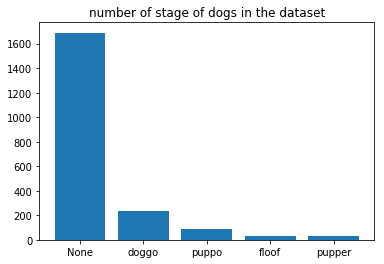

In [109]:
plt.bar(x = new_df.Stage.unique() ,height = new_df.Stage.value_counts())
plt.title('number of stage of dogs in the dataset')

In [86]:
new_df.name.value_counts()[1:9]

Charlie    11
Oliver     10
Lucy       10
Penny      10
Tucker     10
Cooper     10
Lola        8
Sadie       8
Name: name, dtype: int64

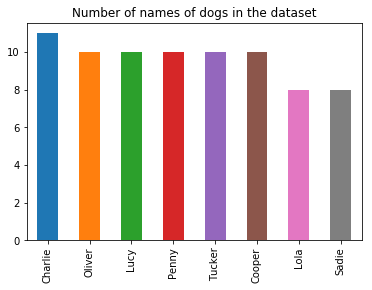

In [104]:
new_df.name.value_counts()[1:9].plot('bar',title = "Number of names of dogs in the dataset")

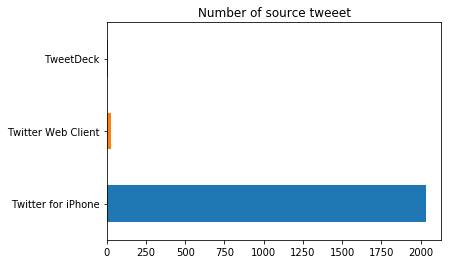

In [173]:
new_df.source.value_counts().plot('barh',title='Number of source tweeet')

## Here i think it's safe to assume that the dataset is cleaned enough 

In [168]:
new_df.to_csv('Clean_data.csv')

# Refrence 
http://adilmoujahid.com/posts/2014/07/twitter-analytics/